In [109]:
import pandas as pd
knjige = pd.read_csv("knjige.csv", index_col="id knjige", sep=";")
pd.options.display.max_rows = 20

In [110]:
knjige.head(10)

,naslov,jezik,datum objave,stevilo prenosov,tezavnost
id knjige,,,,,
2641,A Room with a View,English,2001,118526,84.8
2701,"Moby Dick; Or, The Whale",English,2001,114314,73.3
17157,Gulliver's Travels into Several Remote Regions...,English,2005,92823,65.5
84,"Frankenstein; Or, The Modern Prometheus",English,1993,91683,65.0
100,The Complete Works of William Shakespeare,English,1994,90742,83.0
158,Emma,English,1994,90137,71.2
1080,A Modest ProposalFor preventing the children o...,English,1997,88993,37.3
16389,The Enchanted April,English,2005,83016,81.0
1513,Romeo and Juliet,English,1998,82087,92.6


In [111]:
knjige[["naslov", "stevilo prenosov"]]

,naslov,stevilo prenosov
id knjige,,
2641,A Room with a View,118526
2701,"Moby Dick; Or, The Whale",114314
17157,Gulliver's Travels into Several Remote Regions...,92823
84,"Frankenstein; Or, The Modern Prometheus",91683
100,The Complete Works of William Shakespeare,90742
...,...,...
1635,Ion,2002
39784,Mother Goose's Nursery RhymesA Collection of A...,2000
8601,The Early Poems of Alfred Lord Tennyson,1998


In [127]:
knjige[knjige["datum objave"]==2001]

,naslov,jezik,datum objave,stevilo prenosov,tezavnost,v_tisoc
id knjige,,,,,,
2641,A Room with a View,English,2001,118526,84.8,118
2701,"Moby Dick; Or, The Whale",English,2001,114314,73.3,114
2542,A Doll's House : a play,English,2001,52914,86.6,52
2643,The History of John Bull,English,2001,49239,75.1,49
2638,The Idiot,English,2001,42469,80.9,42
...,...,...,...,...,...,...
2680,Meditations,English,2001,11438,62.7,11
2848,Antiquities of the Jews,English,2001,6846,48.5,6
2814,Dubliners,English,2001,6824,81.7,6


In [113]:
lahke_knjige = knjige[knjige["tezavnost"] <= 50.0]
lahke_knjige

,naslov,jezik,datum objave,stevilo prenosov,tezavnost
id knjige,,,,,
1080,A Modest ProposalFor preventing the children o...,English,1997,88993,37.3
2160,The Expedition of Humphry Clinker,English,2000,77932,46.7
6761,The Adventures of Ferdinand Count Fathom — Com...,English,2004,55150,38.0
4085,The Adventures of Roderick Random,English,2003,53611,49.2
25305,Memoirs of Fanny HillA New and Genuine Edition...,English,2008,42796,35.8
...,...,...,...,...,...
37423,How We Think,English,2011,2134,45.6
15784,The Chronology of Ancient Kingdoms AmendedTo w...,English,2005,2114,44.6
20738,Diccionario Ingles-Español-TagalogCon partes d...,Tagalog,2007,2042,46.8


In [ ]:
zanri_k = pd.read_csv("zanri_knjige.csv", index_col="id zanra", sep=";")

In [ ]:
knjige_in_zanri = pd.merge(knjige, zanri_k, left_on = "id knjige", right_on="id zanra")
knjige_in_zanri

,naslov,jezik,datum objave,stevilo prenosov,tezavnost,v_tisoc,id knjige
0,"Moby Dick; Or, The Whale",English,2001,114314,73.3,114,174
1,"Moby Dick; Or, The Whale",English,2001,114314,73.3,114,4078
2,"Frankenstein; Or, The Modern Prometheus",English,1993,91683,65.0,91,139
3,"History of Tom Jones, a Foundling",English,2004,77337,58.0,77,18857
4,"History of Tom Jones, a Foundling",English,2004,77337,58.0,77,4791
...,...,...,...,...,...,...,...
291,Following the Equator: A Journey Around the World,English,2004,2104,67.3,2,16357
292,Following the Equator: A Journey Around the World,English,2004,2104,67.3,2,26420
293,The Anglo-Saxon Chronicle,English,1996,2069,72.7,2,1564
294,Far from the Madding Crowd,English,1994,2020,79.4,2,159


In [144]:
zanri = pd.read_csv("zanri.csv", sep=";") 

# imena in  id-id žanra
#povezano = pd.merge(zanri_k, zanri, on="id zanra")

# Združevanje po id-ju knjige
#povezano = pd.merge(povezano, knjige, on="id knjige")

# zanri in zanri_knjige
zanri_p = pd.merge(zanri_k, zanri, left_on="id zanra", right_on="id zanra")

# povezano s Knjigami
skupaj = pd.merge(zanri_p, knjige, left_on="id zanra", right_on="id knjige") 
skupaj

,id zanra,id knjige,zanr,naslov,jezik,datum objave,stevilo prenosov,tezavnost,v_tisoc
0,11,2701,Whaling -- Fiction,Alice's Adventures in Wonderland,English,2008,61413,87.5,61
1,36,84,Science fiction,The War of the Worlds,English,2004,30815,77.8,30
2,141,289,Animals -- Fiction,Mansfield Park,English,1994,40270,66.3,40
3,36,18857,Science fiction,The War of the Worlds,English,2004,30815,77.8,30
4,6593,18857,Earth (Planet) -- Core -- Fiction,"History of Tom Jones, a Foundling",English,2004,77337,58.0,77
...,...,...,...,...,...,...,...,...,...
291,10,27558,"Geography -- Handbooks, manuals, etc.",The King James Version of the Bible,English,1989,8139,77.2,8
292,657,1564,"Johnson, Samuel, 1709-1784",The Anglo-Saxon Chronicle,English,1996,2069,72.7,2
293,2610,700,Gamblers -- Fiction,Notre-Dame de Paris,English,2001,28284,78.5,28
294,2542,883,Poor families -- Fiction,A Doll's House : a play,English,2001,52914,86.6,52


In [116]:
osebe = pd.read_csv("osebe.csv", index_col="id osebe", sep=";")
osebe_knjige = pd.read_csv("osebe_knjige.csv", index_col="id osebe", sep=";")

avtorji = pd.merge(osebe, osebe_knjige[osebe_knjige["vloga"] == "A"], left_on="id osebe", right_on="id osebe")
avtorji

,oseba,id knjige,vloga
id osebe,,,
975,"Forster, E. M. (Edward Morgan), 1879-1970",2641,A
975,"Forster, E. M. (Edward Morgan), 1879-1970",61221,A
9,"Melville, Herman, 1819-1891",2701,A
9,"Melville, Herman, 1819-1891",11231,A
9,"Melville, Herman, 1819-1891",15,A
...,...,...,...
36232,"Ellwanger, William De Lancey, 1854-1913",33144,A
41908,"Pigafetta, Antonio, 1480?-1534?",42884,A
2987,"Tennyson, Alfred Tennyson, Baron, 1809-1892",8601,A


In [117]:
prevajalci = pd.merge(osebe, osebe_knjige[osebe_knjige["vloga"] == "P"], left_on="id osebe", right_on="id osebe")
prevajalci

,oseba,id knjige,vloga
id osebe,,,
2877,"Wall, Charles Heron",9070,P
2858,"Garnett, Constance, 1861-1946",2554,P
2858,"Garnett, Constance, 1861-1946",13415,P
2858,"Garnett, Constance, 1861-1946",28054,P
2858,"Garnett, Constance, 1861-1946",36034,P
...,...,...,...
760,"Giles, J. A. (John Allen), 1808-1884",657,P
45796,"Auden, H. W. (Henry William), 1867-1940",50280,P
38094,"Bennett, Hannaford, 1867-1946",76493,P


In [118]:
ilustratorji = pd.merge(osebe, osebe_knjige[osebe_knjige["vloga"] == "I"], left_on="id osebe", right_on="id osebe")
ilustratorji

,oseba,id knjige,vloga
id osebe,,,
26815,"Brock, C. E. (Charles Edmund), 1870-1938",394,I
6202,"Merrill, Frank T., 1848-1923",37106,I
4488,"Ralph, Lester",8525,I
53048,"Forte, John R. (John Robert), 1918-1966",64820,I
53048,"Forte, John R. (John Robert), 1918-1966",22629,I
...,...,...,...
32544,"Gage, George W., 1887-1957",76493,I
31359,"Gilbert, John, 1817-1897",39784,I
7195,"Crane, Walter, 1845-1915",39784,I


In [119]:
nemske = knjige[knjige["jezik"]=="German" ]
nemske

,naslov,jezik,datum objave,stevilo prenosov,tezavnost
id knjige,,,,,
24571,Der Struwwelpeteroder lustige Geschichten und ...,German,2008,49663,81.9
22367,Die Verwandlung,German,2007,27074,69.5
17161,Max und Moritz: Eine Bubengeschichte in sieben...,German,2005,25528,83.5
43438,Erotika Biblion,German,2013,25017,65.6
39938,Drei Abhandlungen zur Sexualtheorie,German,2012,24774,46.7
68400,Der Marquis de Sade und seine Zeit.,German,2022,24622,72.0
31284,Josefine Mutzenbacheroder Die Geschichte einer...,German,2010,19585,92.9
75397,Der Skorpion. Band 1,German,2025,12987,84.1
51221,Geschlecht und Charakter: Eine prinzipielle Un...,German,2016,12796,55.7


In [120]:
stevilo_prenosov_glede_na_tezavnost = knjige[["stevilo prenosov", "tezavnost"]]
stevilo_prenosov_glede_na_tezavnost

,stevilo prenosov,tezavnost
id knjige,,
2641,118526,84.8
2701,114314,73.3
17157,92823,65.5
84,91683,65.0
100,90742,83.0
...,...,...
1635,2002,73.2
39784,2000,86.8
8601,1998,75.6


<Axes: xlabel='stevilo prenosov', ylabel='tezavnost'>

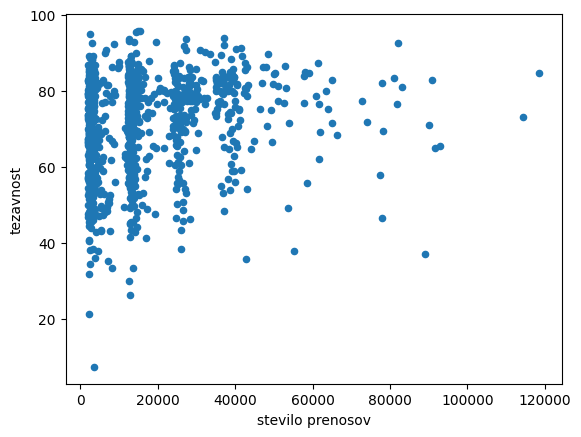

In [121]:
import matplotlib.pyplot as plt
stevilo_prenosov_glede_na_tezavnost.plot.scatter(x="stevilo prenosov", y="tezavnost", title="")

In [122]:
knjige["v_tisoc"] = (knjige["stevilo prenosov"] // 1000)
knjige

,naslov,jezik,datum objave,stevilo prenosov,tezavnost,v_tisoc
id knjige,,,,,,
2641,A Room with a View,English,2001,118526,84.8,118
2701,"Moby Dick; Or, The Whale",English,2001,114314,73.3,114
17157,Gulliver's Travels into Several Remote Regions...,English,2005,92823,65.5,92
84,"Frankenstein; Or, The Modern Prometheus",English,1993,91683,65.0,91
100,The Complete Works of William Shakespeare,English,1994,90742,83.0,90
...,...,...,...,...,...,...
1635,Ion,English,1999,2002,73.2,2
39784,Mother Goose's Nursery RhymesA Collection of A...,English,2012,2000,86.8,2
8601,The Early Poems of Alfred Lord Tennyson,English,2005,1998,75.6,1


<Axes: xlabel='v_tisoc', ylabel='tezavnost'>

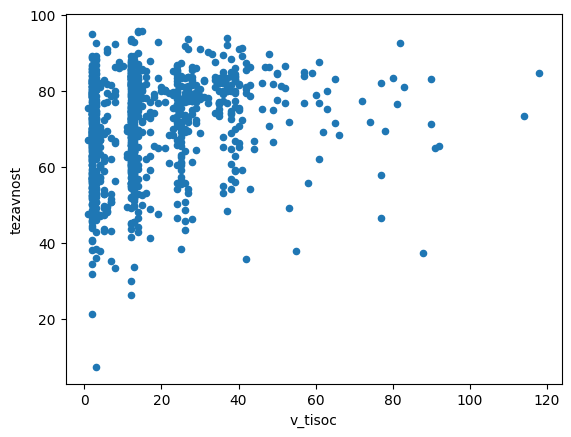

In [123]:
stevilo_prenosov_glede_na_tezavnost = knjige[["v_tisoc", "tezavnost"]]
stevilo_prenosov_glede_na_tezavnost.plot.scatter(x="v_tisoc", y="tezavnost", title="")

In [124]:
prenosi_po_letih = knjige.groupby("datum objave")["stevilo prenosov"].sum()
prenosi_po_letih

datum objave
1971      3205
1973      2389
1989      8139
1991     20090
1992      5973
         ...  
2021    159404
2022    210874
2023    102440
2024     94206
2025    115611
Name: stevilo prenosov, Length: 38, dtype: int64

<Axes: title={'center': 'stevilo prenosov glede na datum objave'}, xlabel='datum objave'>

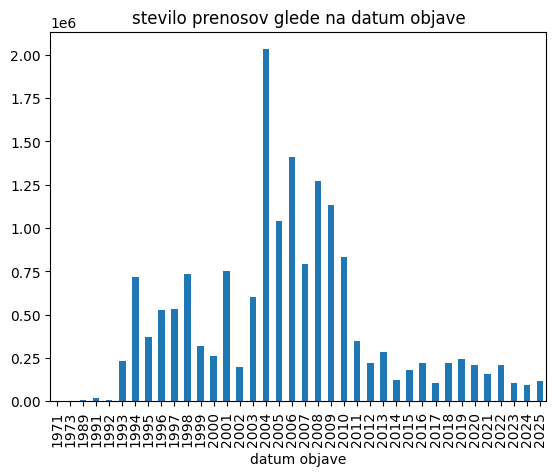

In [125]:
prenosi_po_letih.plot.bar(x="datum objave", y="stevilo prenosov", title="stevilo prenosov glede na datum objave")

<Axes: title={'center': 'stevilo prenosov glede na jezik'}, xlabel='jezik'>

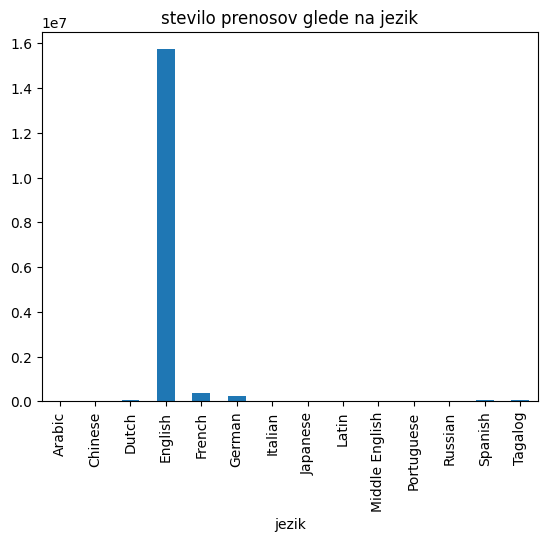

In [145]:
prenosi_jezik = knjige.groupby("jezik")["stevilo prenosov"].sum()
prenosi_jezik.plot.bar(x="jezik", y="stevilo prenosov", title="stevilo prenosov glede na jezik")